<a href="https://colab.research.google.com/github/sai2565/ML-Model-to-predict-COVID-19-Cases-in-India/blob/master/ML_Model_to_predict_COVID_19_Cases_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Model to predict COVID 19 Cases in India

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('COVID_Cases_By_Day.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding Categorical Data

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#Transformer for country
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#Transformer for Population
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct1.fit_transform(X))
#Transformer for Population Density
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))
#Transformer for Median Age
ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9])], remainder='passthrough')
X = np.array(ct3.fit_transform(X))

## Training the Polynomial Regression model on the whole dataset

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#Building a Polynomial Linear Regression Model of Degree 4
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting a new result with Polynomial Regression

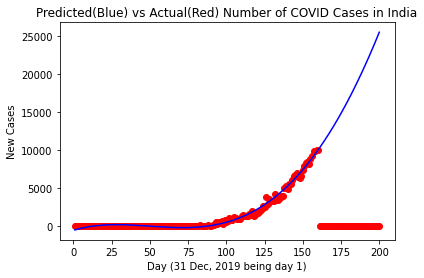

In [15]:
#Predicting custom data set and plotting the predictions vs actual
daysdataset = pd.read_csv('Days.csv')
X_test = daysdataset.iloc[:, :].values
casesIndia = pd.read_csv('India.csv')
Y_Actual = casesIndia.iloc[:, :].values
plt.scatter(X_test[:,12], Y_Actual, color = 'red')
plt.plot(X_test[:,12], lin_reg.predict(poly_reg.fit_transform(X_test)), color = 'blue')
plt.title('Predicted(Blue) vs Actual(Red) Number of COVID Cases in India')
plt.xlabel('Day (31 Dec, 2019 being day 1)')
plt.ylabel('New Cases')
plt.show()

In [16]:
#Predicting the number of cases on 161st day in India
lin_reg.predict(poly_reg.fit_transform([[1,0,0,0,0,1,0,0,1,1,0,0,161]]))

array([10327.39397942])